<center><b>Deep Learning - Neural Network Implementation using Keras</b></center><br>

The code below uses Keras to implement a neural network with 5 hidden layers and dropout regularization.

In [13]:
import os
import time
import h5py
import numpy as np
import matplotlib.pyplot as plt
import zipfile

import tensorflow as tf
print(tf.__version__)

2.1.0


In [15]:
# Handle dataset
path = os.getcwd()
data_file = path+"/data/DeepLearning/keras_data.zip"

data = zipfile.ZipFile(data_file)
data_file = data.open('data.h5')

def loadData():
  with h5py.File(data_file,'r') as hf:
    print('List of arrays in this file: \n', hf.keys())
    allTrain = hf.get('trainData')
    allTest = hf.get('testData')
    npTrain = np.array(allTrain)
    npTest = np.array(allTest)
    print('Shape of the array dataset_1: \n', npTrain.shape)
    print('Shape of the array dataset_2: \n', npTest.shape)
    return npTrain[:,:-1], npTrain[:, -1], npTest[:,:-1], npTest[:, -1]

trainX, trainY, testX, testY = loadData()
print(trainY.shape)

List of arrays in this file: 
 <KeysViewHDF5 ['testData', 'trainData']>
Shape of the array dataset_1: 
 (200000, 785)
Shape of the array dataset_2: 
 (17000, 785)
(200000,)


In [11]:
# Helper function to plot data
def plot_training(history):
  # Plot training & validation accuracy values
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

Train on 180000 samples, validate on 20000 samples
Epoch 1/20
180000/180000 [==============================] - 50s 275us/sample - loss: 0.6294 - accuracy: 0.8108 - val_loss: 0.4538 - val_accuracy: 0.8610
Epoch 2/20
180000/180000 [==============================] - 43s 238us/sample - loss: 0.4852 - accuracy: 0.8562 - val_loss: 0.4144 - val_accuracy: 0.8752
Epoch 3/20
180000/180000 [==============================] - 44s 243us/sample - loss: 0.4468 - accuracy: 0.8676 - val_loss: 0.3810 - val_accuracy: 0.8842
Epoch 4/20
180000/180000 [==============================] - 37s 207us/sample - loss: 0.4219 - accuracy: 0.8752 - val_loss: 0.3713 - val_accuracy: 0.8878
Epoch 5/20
180000/180000 [==============================] - 36s 202us/sample - loss: 0.4041 - accuracy: 0.8803 - val_loss: 0.3616 - val_accuracy: 0.8906
Epoch 6/20
180000/180000 [==============================] - 40s 223us/sample - loss: 0.3908 - accuracy: 0.8839 - val_loss: 0.3587 - val_accuracy: 0.8949
Epoch 7/20
180000/180000 [=====

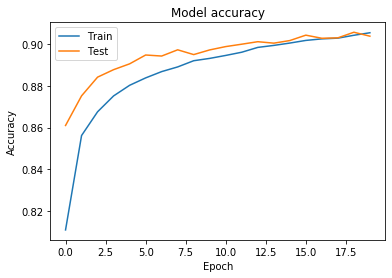

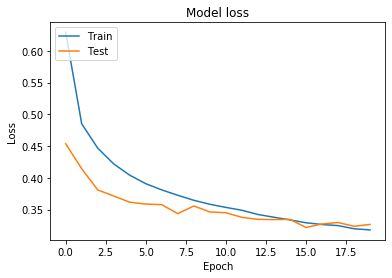

In [12]:
DROPUT_RATE = 0.4

# Create the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1000, activation=tf.nn.relu, input_shape=(784,)),
  tf.keras.layers.Dropout(DROPUT_RATE),
  tf.keras.layers.Dense(800, activation=tf.nn.relu),
  tf.keras.layers.Dropout(DROPUT_RATE),
  tf.keras.layers.Dense(600, activation=tf.nn.relu),
  tf.keras.layers.Dropout(DROPUT_RATE),
  tf.keras.layers.Dense(400, activation=tf.nn.relu),
  tf.keras.layers.Dropout(DROPUT_RATE),
  tf.keras.layers.Dense(200, activation=tf.nn.relu),
  tf.keras.layers.Dropout(DROPUT_RATE),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
# Train the model
history = model.fit(trainX, trainY, epochs=20, validation_split=0.1, batch_size=256)
training_time = time.time() - start_time
results = model.evaluate(testX, testY)

print('Completed in {:.2f} sec. Loss: {:.2f}. Accuracy: {:.2f}%'.format(training_time, results[0], results[1]*100.0))
plot_training(history)